In [4]:
# lets import necessary libraries
import numpy as numpy
import pandas as pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from datetime import datetime, timedelta
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
import os


import re
import unicodedata
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')

In [5]:
# lets load the dataset
import pandas as pd
df = pd.read_csv("ai_task_management_dataset.csv")

In [6]:
df.head()

,Task Description,Category,Skill,Priority,AI_Complexity,Risk_Level,Automation_Potential,Estimated_Time_Hours,Actual_Hours_Spent,Deadline,Task_Status,Assigned_To,Creation_Date
0,Develop federated microlearning path for audit...,Marketing,Lifecycle Marketing,Medium,Simple,High,Medium,44,17,2025-03-04,On Hold,Adam Becker,2024-12-01
1,Instrument federated telemetry classifier for ...,People Operations,Learning Experience,Low,Simple,High,Medium,43,19,2025-01-09,In Progress,Jordan Kim,2024-12-01
2,Localize hybrid readiness pack for renewal teams,IT Service,Service Design,Low,Advanced,Medium,High,34,18,2024-12-31,In Progress,Anika Bose,2024-12-01
3,Harden security-hardened escalation checklist ...,Localization,Linguistics,Critical,Advanced,Medium,Low,43,0,2025-01-01,Not Started,Jonah Patel,2024-12-01
4,Launch workflow-centric compliance dossier for...,Governance,Policy Design,High,Simple,Medium,Medium,27,10,2025-01-25,In Progress,Riya Khanna,2024-12-01


In [7]:
df.info

<bound method DataFrame.info of                                        Task Description              Category  \
0     Develop federated microlearning path for audit...             Marketing   
1     Instrument federated telemetry classifier for ...     People Operations   
2      Localize hybrid readiness pack for renewal teams            IT Service   
3     Harden security-hardened escalation checklist ...          Localization   
4     Launch workflow-centric compliance dossier for...            Governance   
...                                                 ...                   ...   
9995  Craft customer-facing copilot launch for DACH ...          Supply Chain   
9996  Evaluate AI-powered task routing engine for in...          Data Science   
9997  Prototype data-driven churn model for growth i...          Supply Chain   
9998  Facilitate partner-facing supply risk model fo...  Knowledge Management   
9999  Prioritize enterprise prompt library for EU re...            Facilities

In [8]:
df.shape

(10000, 13)

In [9]:
df.describe()

,Estimated_Time_Hours,Actual_Hours_Spent
count,10000.00000,10000.000000
mean,30.21490,17.649300
std,12.91503,14.537904
min,8.00000,0.000000
25%,19.00000,6.000000
50%,30.00000,14.000000
75%,41.00000,27.000000
max,52.00000,62.000000


## Data Preprocessing

In [10]:
df.head()

,Task Description,Category,Skill,Priority,AI_Complexity,Risk_Level,Automation_Potential,Estimated_Time_Hours,Actual_Hours_Spent,Deadline,Task_Status,Assigned_To,Creation_Date
0,Develop federated microlearning path for audit...,Marketing,Lifecycle Marketing,Medium,Simple,High,Medium,44,17,2025-03-04,On Hold,Adam Becker,2024-12-01
1,Instrument federated telemetry classifier for ...,People Operations,Learning Experience,Low,Simple,High,Medium,43,19,2025-01-09,In Progress,Jordan Kim,2024-12-01
2,Localize hybrid readiness pack for renewal teams,IT Service,Service Design,Low,Advanced,Medium,High,34,18,2024-12-31,In Progress,Anika Bose,2024-12-01
3,Harden security-hardened escalation checklist ...,Localization,Linguistics,Critical,Advanced,Medium,Low,43,0,2025-01-01,Not Started,Jonah Patel,2024-12-01
4,Launch workflow-centric compliance dossier for...,Governance,Policy Design,High,Simple,Medium,Medium,27,10,2025-01-25,In Progress,Riya Khanna,2024-12-01


In [11]:
# lets check missing values
df.isnull().sum()

Task Description        0
Category                0
Skill                   0
Priority                0
AI_Complexity           0
Risk_Level              0
Automation_Potential    0
Estimated_Time_Hours    0
Actual_Hours_Spent      0
Deadline                0
Task_Status             0
Assigned_To             0
Creation_Date           0
dtype: int64

In [12]:
df['Assigned_To'].value_counts()

Assigned_To
Hassan Ali        355
Marco Alvarez     353
Jacob Stein       353
Daniel Brooks     350
Holly Nguyen      350
Lucia Romero      348
Yoon Park         347
Riya Khanna       347
Sofia Rossi       346
Lina Chow         344
Victor Morales    342
Anika Bose        341
Caleb Nguyen      338
Ethan Wright      338
Adam Becker       337
Helen Fischer     334
Priya Desai       334
Grace Thompson    332
Farah Ibrahim     331
Amira Patel       330
Luis Hernandez    329
Mei Tan           326
Nora Hassan       322
Oliver Grant      322
Jonah Patel       322
Felix Bauer       319
Emily Chen        317
Jordan Kim        313
Miguel Santos     298
Sara Coleman      282
Name: count, dtype: int64

In [13]:
# convert datecolumns to datetime
df["Creation_Date"] = pd.to_datetime(df["Creation_Date"], errors="coerce")
df["Deadline"] = pd.to_datetime(df["Deadline"], errors="coerce")

In [14]:
numeric_cols = ["Estimated_Time_Hours", "Actual_Hours_Spent"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

In [15]:
df["Estimated_Time_Hours"] = df["Estimated_Time_Hours"].clip(lower=0)
df["Actual_Hours_Spent"]    = df["Actual_Hours_Spent"].clip(lower=0)

In [16]:
# lets drop dupliate tasks
df= df.drop_duplicates(subset=["Task Description", "Skill", "Assigned_To"])

In [17]:
df.shape

(10000, 13)

In [18]:
# derived columns
df["Days_Left"] = (df["Deadline"] - df["Creation_Date"]).dt.days

In [19]:
# standardizing text columns
text_cols = [
    "Task Description", "Category", "Skill", "Priority",
    "AI_Complexity", "Risk_Level", "Automation_Potential",
    "Task_Status", "Assigned_To"
]

for col in text_cols:
    df[col] = df[col].astype(str).str.strip()

In [20]:
df.dtypes

Task Description                object
Category                        object
Skill                           object
Priority                        object
AI_Complexity                   object
Risk_Level                      object
Automation_Potential            object
Estimated_Time_Hours             int64
Actual_Hours_Spent               int64
Deadline                datetime64[ns]
Task_Status                     object
Assigned_To                     object
Creation_Date           datetime64[ns]
Days_Left                        int64
dtype: object

## exploratory data analysis

<Axes: >

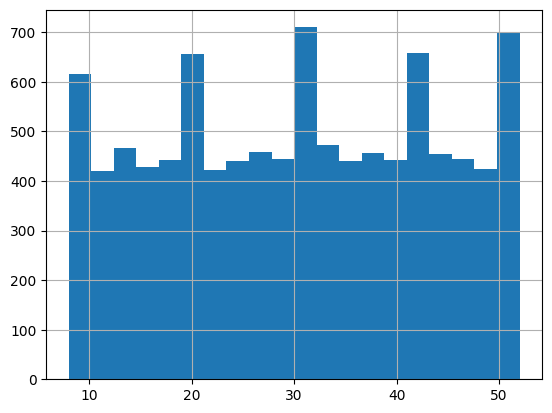

In [21]:
# unvariate
df['Estimated_Time_Hours'].hist(bins=20)

<Axes: >

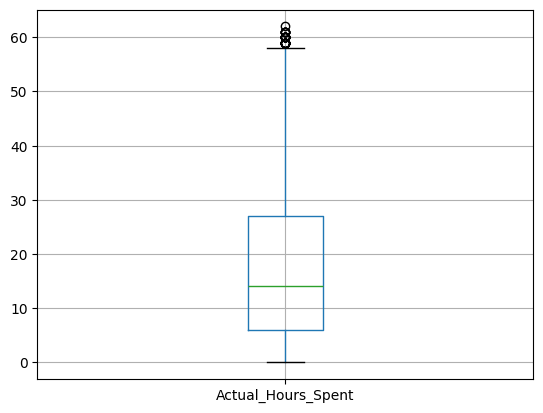

In [22]:
df.boxplot(column='Actual_Hours_Spent')

In [23]:
df["Category"].value_counts()

Category
Finance                   535
IT Service                530
Engineering               526
Data Science              525
Sales Enablement          520
Knowledge Management      517
Marketing                 516
Product                   502
Legal                     497
Compliance                497
Customer Support          495
Training & Development    495
People Operations         492
Security                  486
Operations                485
Supply Chain              482
Governance                481
Facilities                480
Localization              472
Analytics                 467
Name: count, dtype: int64

<Axes: xlabel='Category'>

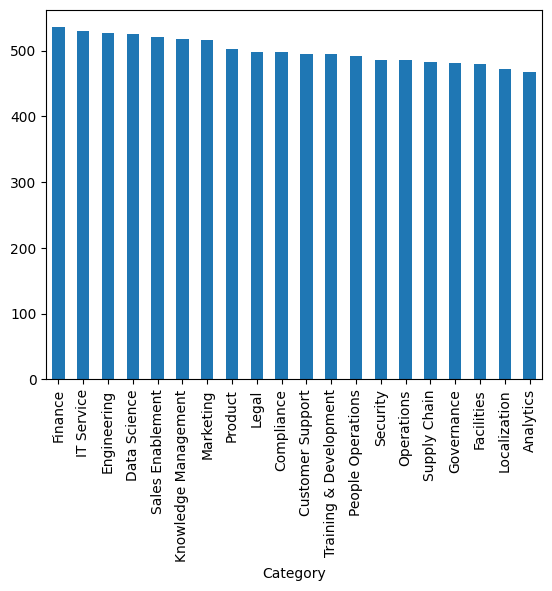

In [24]:
df['Category'].value_counts().plot(kind='bar')

<Axes: xlabel='Estimated_Time_Hours', ylabel='Actual_Hours_Spent'>

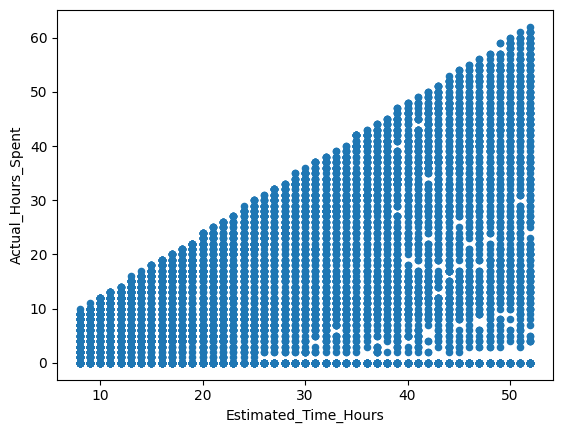

In [25]:
# bivariate analysis
df.plot(kind='scatter', x='Estimated_Time_Hours', y='Actual_Hours_Spent')

<Axes: title={'center': 'Actual_Hours_Spent'}, xlabel='Priority'>

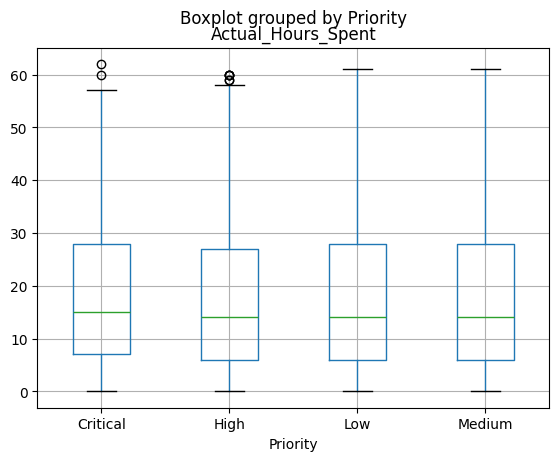

In [26]:
df.boxplot(column='Actual_Hours_Spent', by='Priority')

In [27]:
pd.crosstab(df['Category'], df['Task_Status'])

Task_Status,Blocked,Completed,Deferred,In Progress,Not Started,On Hold
Category,,,,,,
Analytics,18,136,17,209,53,34
Compliance,18,155,17,218,48,41
Customer Support,16,146,20,218,68,27
Data Science,24,162,18,211,79,31
Engineering,21,159,20,235,57,34
Facilities,22,149,17,194,58,40
Finance,13,144,22,239,75,42
Governance,13,156,23,211,51,27
IT Service,20,143,22,258,54,33


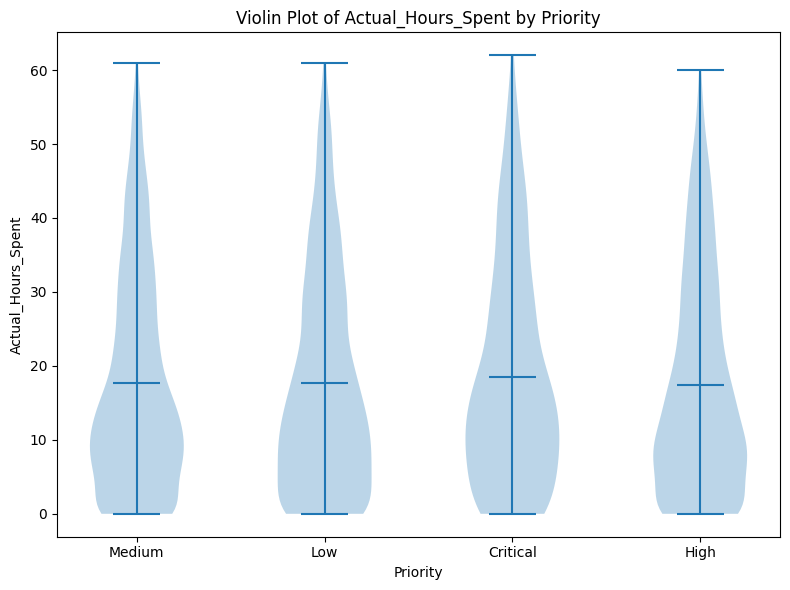

In [28]:
import matplotlib.pyplot as plt
cat_col = "Priority"                
num_col = "Actual_Hours_Spent"

categories = df[cat_col].unique()
data = [df[df[cat_col] == c][num_col].dropna() for c in categories]

# violin plot
plt.figure(figsize=(8, 6))
plt.violinplot(data, showmeans=True)

# Label 
plt.xticks(range(1, len(categories) + 1), categories)
plt.xlabel(cat_col)
plt.ylabel(num_col)
plt.title(f"Violin Plot of {num_col} by {cat_col}")
plt.tight_layout()
plt.show()

<Axes: xlabel='Category'>

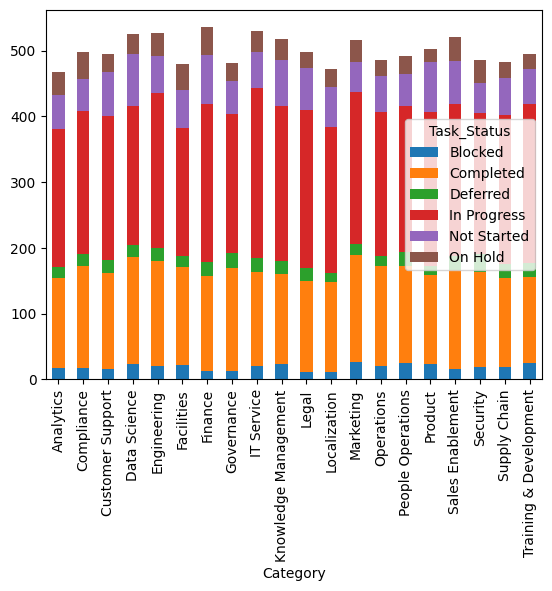

In [29]:
pd.crosstab(df['Category'], df['Task_Status']).plot(kind='bar', stacked=True)

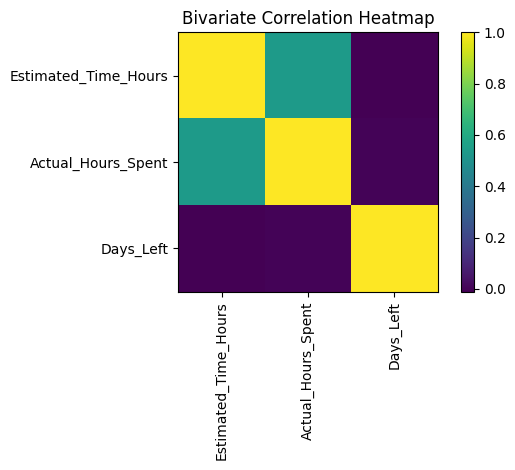

In [30]:
# multi variate analysis
num_cols = df.select_dtypes(include=['float64', 'int64'])
corr = num_cols.corr()

#  heatmap
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Bivariate Correlation Heatmap")
plt.tight_layout()
plt.show()

In [31]:
pd.pivot_table(
    df,
    values='Actual_Hours_Spent',
    index='Category',
    columns='Priority',
    aggfunc='mean'
)

Priority,Critical,High,Low,Medium
Category,,,,
Analytics,25.315789,16.691176,15.536364,18.410891
Compliance,22.620690,17.322785,17.287356,19.470852
Customer Support,18.333333,15.580882,18.062500,18.733051
Data Science,17.840000,17.104575,15.731481,18.301255
Engineering,16.185185,17.814607,18.604396,18.682609
Facilities,12.869565,19.177305,17.282828,18.488479
Finance,17.958333,17.216561,15.204301,16.038314
Governance,19.384615,18.006250,20.023529,17.580952
IT Service,16.764706,17.191083,18.960784,17.161417


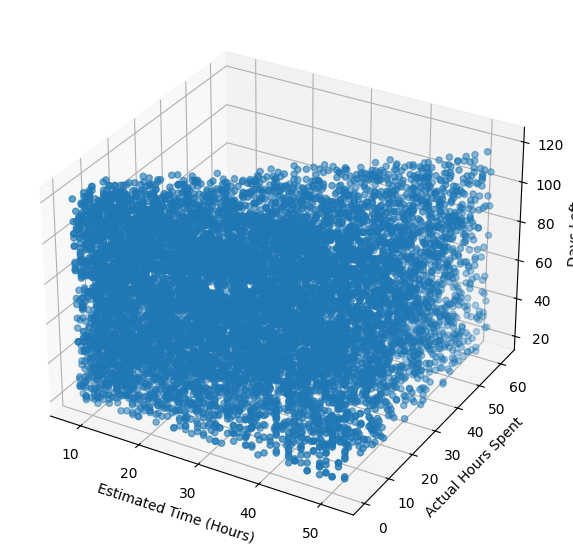

In [32]:
from mpl_toolkits.mplot3d import Axes3D

# Assign
x = df['Estimated_Time_Hours']
y = df['Actual_Hours_Spent']
z = df['Days_Left']

# 3D Scatter Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_xlabel("Estimated Time (Hours)")
ax.set_ylabel("Actual Hours Spent")
ax.set_zlabel("Days Left")
plt.show()


## Feature extraction using TF-IDF 

In [48]:
df.head()

,Task Description,Category,Skill,Priority,AI_Complexity,Risk_Level,Automation_Potential,Estimated_Time_Hours,Actual_Hours_Spent,Deadline,Task_Status,Assigned_To,Creation_Date
0,Develop federated microlearning path for audit...,Marketing,Lifecycle Marketing,Medium,Simple,High,Medium,44,17,2025-03-04,On Hold,Adam Becker,2024-12-01
1,Instrument federated telemetry classifier for ...,People Operations,Learning Experience,Low,Simple,High,Medium,43,19,2025-01-09,In Progress,Jordan Kim,2024-12-01
2,Localize hybrid readiness pack for renewal teams,IT Service,Service Design,Low,Advanced,Medium,High,34,18,2024-12-31,In Progress,Anika Bose,2024-12-01
3,Harden security-hardened escalation checklist ...,Localization,Linguistics,Critical,Advanced,Medium,Low,43,0,2025-01-01,Not Started,Jonah Patel,2024-12-01
4,Launch workflow-centric compliance dossier for...,Governance,Policy Design,High,Simple,Medium,Medium,27,10,2025-01-25,In Progress,Riya Khanna,2024-12-01


In [61]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack



# === 1. SMART TEXT CLEANING ===
def enhance_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    
    # Preserve technical tokens: keep letters, digits, hyphens, underscores
    text = re.sub(r'[^a-z0-9\s\-_]', ' ', text)
    
    # Inject SIGNAL WORDS as explicit tokens (boosts keyword presence)
    signal_words = [
        'automate', 'auto', 'bot', 'script', 'template', 'generate',
        'manual', 'human', 'review', 'approve', 'complex', 'simple',
        'rule', 'workflow', 'pipeline', 'routine', 'repetitive'
    ]
    
    for word in signal_words:
        if word in text:
            text += f" KEYWORD_{word}"  # e.g., "auto" → adds "KEYWORD_auto"
    
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Enhanced_Text'] = df['Task Description'].apply(enhance_text)

# Drop missing targets
df = df.dropna(subset=['Automation_Potential'])
X = df['Enhanced_Text']
y = df['Automation_Potential']

# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

# === 2. HYBRID TF-IDF: WORD + CHAR N-GRAMS ===
# Word-level: captures phrases
tfidf_word = TfidfVectorizer(
    analyzer='word',
    ngram_range=(1, 3),
    max_features=5000,
    stop_words='english',
    min_df=2,
    max_df=0.85,
    sublinear_tf=True
)

# Char-level: captures jargon fragments
tfidf_char = TfidfVectorizer(
    analyzer='char_wb',
    ngram_range=(3, 6),
    max_features=3000,
    lowercase=True
)

# Fit and transform
X_train_word = tfidf_word.fit_transform(X_train)
X_train_char = tfidf_char.fit_transform(X_train)
X_test_word = tfidf_word.transform(X_test)
X_test_char = tfidf_char.transform(X_test)

# Combine
X_train_full = hstack([X_train_word, X_train_char])
X_test_full = hstack([X_test_word, X_test_char])

# === 3. TRAIN MODELS ===
# Naive Bayes (only on word TF-IDF is safer, but hybrid often works)
nb = MultinomialNB(alpha=0.01)  # very low smoothing
nb.fit(X_train_full, y_train)
y_pred_nb = nb.predict(X_test_full)

svm = LinearSVC(
    C=0.5,                     # Slightly regularized
    class_weight='balanced',
    random_state=42,
    max_iter=5000,
    dual=False                 # better for n_samples > n_features
)
svm.fit(X_train_full, y_train)
y_pred_svm = svm.predict(X_test_full)

# === 4. EVALUATE ===
print("=== MULTINOMIAL NAIVE BAYES (Optimized TF-IDF) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))

print("\n=== LINEAR SVM (Optimized TF-IDF) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

=== MULTINOMIAL NAIVE BAYES (Optimized TF-IDF) ===
Accuracy: 0.3715
              precision    recall  f1-score   support

        High       0.34      0.33      0.33       649
         Low       0.26      0.23      0.24       479
      Medium       0.45      0.48      0.46       872

    accuracy                           0.37      2000
   macro avg       0.35      0.35      0.35      2000
weighted avg       0.37      0.37      0.37      2000


=== LINEAR SVM (Optimized TF-IDF) ===
Accuracy: 0.3630
              precision    recall  f1-score   support

        High       0.33      0.33      0.33       649
         Low       0.25      0.28      0.26       479
      Medium       0.46      0.44      0.45       872

    accuracy                           0.36      2000
   macro avg       0.35      0.35      0.35      2000
weighted avg       0.37      0.36      0.37      2000

